In [112]:
%matplotlib inline

import numpy as np
import pandas as pd
import cufflinks   # nicer plots, see https://plot.ly/ipython-notebooks/cufflinks/
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['class'] = iris.target_names[iris.target]

![iris dataset](https://d31ezp3r8jwmks.cloudfront.net/variants/2dzeX71EceP88fenXxy1uj1t/d2e337a4f6900f8d0798c596eb0607a8e0c2fbddb6a7ab7afcd60009c119d4c7)

In [113]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [114]:
df.groupby('class').size()

class
setosa        50
versicolor    50
virginica     50
dtype: int64

In [115]:
df.iplot(x='sepal length (cm)', y='petal length (cm)', categories='class')

# Logistic regression from scratch

## 2 class case

We will construct logistic regression only for Setosa class.

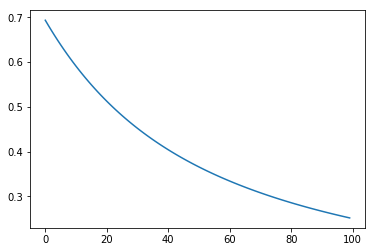

In [116]:
df['setosa'] = (df['class'] == 'setosa').astype('int')

X = df.drop(['class', 'setosa'], axis=1)
X = ((X - X.mean()) / X.std()).values
X = np.hstack([X, np.ones((X.shape[0], 1))])
y = df['setosa']

learning_rate = 0.02
epochs = 100
theta = np.zeros(5)

Loss = []
for i in range(epochs):
    # Logistic model
    pred = 1 / (1 + np.exp(-X.dot(theta)))
    # Gradient descent
    gradient = np.dot(X.T, pred - y) / X.shape[0]
    theta -= learning_rate * gradient
    # Cross-Entropy loss
    Loss.append(-np.mean(y * np.log(pred) + (1 - y) * np.log(1 - pred)))

plt.plot(Loss)

In [117]:
(1 / (1 + np.exp(-X.dot(theta)))).round().astype('int')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [118]:
df['setosa'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [119]:
df.drop('setosa', axis=1, inplace=True)   # Clean up

## 3 class case

See [this link](https://www.quora.com/What-is-the-gradient-of-the-log-likelihood-function-in-multinomial-logistic-regression) for derivative details.

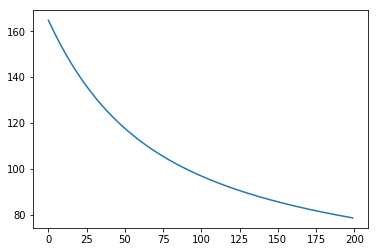

In [120]:
X = df.drop(['class'], axis=1)
X = ((X - X.mean()) / X.std()).values
X = np.hstack([X, np.ones((X.shape[0], 1))])
y = df['class'].map(lambda x: {'setosa': 1, 'versicolor': 2, 'virginica': 3}[x])

learning_rate = 0.01
epochs = 200
theta_1, theta_2, theta_3 = np.zeros(5), np.zeros(5), np.zeros(5)

Loss = []
for i in range(epochs):
    # Logistic model
    total = np.exp(X.dot(theta_1)) + np.exp(X.dot(theta_2)) + np.exp(X.dot(theta_3))
    pred_1 = np.exp(X.dot(theta_1)) / total
    pred_2 = np.exp(X.dot(theta_2)) / total
    pred_3 = np.exp(X.dot(theta_3)) / total

    # Gradient descent
    gradient_1 = np.dot(X.T, pred_1 - (y == 1)) / X.shape[0]
    gradient_2 = np.dot(X.T, pred_2 - (y == 2)) / X.shape[0]
    gradient_3 = np.dot(X.T, pred_3 - (y == 3)) / X.shape[0]

    theta_1 -= learning_rate * gradient_1
    theta_2 -= learning_rate * gradient_2
    theta_3 -= learning_rate * gradient_3

    # Cross-Entropy loss
    Loss.append(-np.sum(np.log(pred_1[y == 1]) + np.log(pred_2[y == 2]) + np.log(pred_3[y == 3])))
    
plt.plot(Loss)

In [121]:
# Predicted
np.vstack([pred_1, pred_2, pred_3]).T.argmax(axis=1) + 1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [122]:
# Acctual
y.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

# Let's go back to sklearn

Previous demo excluded some of the major steps, for example we trained and evaluated on whole dataset. Also it's inefficient to implement algorithm from scratch each time, thus we will use [sklearn implementation of Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression).

## Task 1. Make a train/test split

Use *mask* or [sklearn](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for that.

In [123]:
mask = np.random.random(df.shape[0]) < 0.7
# df[mask]    # train set ~70%
# df[~mask]   # test set ~30%

## Task 2. Use sklearn to reproduce previous results 

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

**Question:** what cross-entropy do you get?

In [125]:
model = LogisticRegression()

model.fit(df[mask].drop('class', axis=1), df[mask]['class'])
pred = model.predict(df[~mask].drop('class', axis=1))
prob = model.predict_proba(df[~mask].drop('class', axis=1))

/home/trokas/anaconda3/envs/ai_primer/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/home/trokas/anaconda3/envs/ai_primer/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



In [126]:
print('Log-loss = {0:.02f}'.format(
    log_loss(df[~mask]['class'], prob)))
print('Hit rate = {0:.02%}'.format(
    (df[~mask]['class'] == pred).mean()))

Log-loss = 0.40
Hit rate = 91.23%


## Task 3. Design metrics, which improve model score

Share and steal ideas to/from neighbours ;)

In [129]:
df['sepal rate'] = df['sepal length (cm)'] / df['sepal width (cm)']
df['petal rate'] = df['petal length (cm)'] / df['petal width (cm)']

df['sepal area'] = df['sepal length (cm)'] * df['sepal width (cm)']
df['petal area'] = df['petal length (cm)'] * df['petal width (cm)']

In [130]:
model = LogisticRegression()

model.fit(df[mask].drop('class', axis=1), df[mask]['class'])
pred = model.predict(df[~mask].drop('class', axis=1))
prob = model.predict_proba(df[~mask].drop('class', axis=1))

print('Log-loss = {0:.02f}'.format(
    log_loss(df[~mask]['class'], prob)))
print('Hit rate = {0:.02%}'.format(
    (df[~mask]['class'] == pred).mean()))

Log-loss = 0.16
Hit rate = 92.98%


/home/trokas/anaconda3/envs/ai_primer/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/home/trokas/anaconda3/envs/ai_primer/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



## Task 4. Search for ideas online

There are thousands of notebooks and blog posts online about Iris dataset with Logistic Regression. Search for some inspiration and try to replicate best ideas.

**Questions**:
    
- Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?
- Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?
